In [1]:
# Librerías para manejo de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de gráficos
plt.style.use('ggplot')
sns.set_palette('pastel')

# Ignorar warnings
import warnings

warnings.filterwarnings('ignore')

# Modelos de regresión y clasificación
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, roc_auc_score, \
    roc_curve, accuracy_score, f1_score

# Preprocesamiento
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

# Si usarás árboles o boosting:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier  # Opcional, si usás XGBoost

# Dimensionalidad (opcional para separación de clases)
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE



In [2]:
# Cargar el dataset
df = pd.read_csv("../data/digital_wallet_ltv_dataset.csv")

# Vista preliminar
df.head()

,Customer_ID,Age,Location,Income_Level,Total_Transactions,Avg_Transaction_Value,Max_Transaction_Value,Min_Transaction_Value,Total_Spent,Active_Days,Last_Transaction_Days_Ago,Loyalty_Points_Earned,Referral_Count,Cashback_Received,App_Usage_Frequency,Preferred_Payment_Method,Support_Tickets_Raised,Issue_Resolution_Time,Customer_Satisfaction_Score,LTV
0,cust_0000,54,Urban,Low,192,16736.384023,60216.834510,6525.814861,3.213386e+06,140,209,2114,25,2224.012140,Monthly,Debit Card,3,61.568590,1,3.279546e+05
1,cust_0001,67,Suburban,High,979,14536.734683,48350.100272,2186.742245,1.423146e+07,229,240,2960,20,4026.823518,Monthly,UPI,17,60.392889,8,1.437053e+06
2,cust_0002,44,Urban,High,329,7061.372800,32521.157187,2743.406808,2.323192e+06,73,21,3170,0,1441.011395,Monthly,Debit Card,11,45.305579,4,2.419387e+05
3,cust_0003,30,Rural,High,71,16426.876453,17827.896720,4360.784994,1.166308e+06,299,285,4756,35,4365.855580,Weekly,Wallet Balance,6,22.030191,1,1.284599e+05
4,cust_0004,58,Urban,Middle,878,10800.092660,17497.634534,4532.872520,9.482481e+06,236,329,1992,18,4161.523827,Daily,UPI,18,20.634723,5,9.569514e+05


Dimensiones, tipos y estructura del dataset

In [3]:
# Dimensiones del dataset
print("Dimensiones del dataset:", df.shape)

# Tipos de datos y valores no nulos
df.info()

Dimensiones del dataset: (7000, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  7000 non-null   object 
 1   Age                          7000 non-null   int64  
 2   Location                     7000 non-null   object 
 3   Income_Level                 7000 non-null   object 
 4   Total_Transactions           7000 non-null   int64  
 5   Avg_Transaction_Value        7000 non-null   float64
 6   Max_Transaction_Value        7000 non-null   float64
 7   Min_Transaction_Value        7000 non-null   float64
 8   Total_Spent                  7000 non-null   float64
 9   Active_Days                  7000 non-null   int64  
 10  Last_Transaction_Days_Ago    7000 non-null   int64  
 11  Loyalty_Points_Earned        7000 non-null   int64  
 12  Referral_Count               7000 non-nu

Estadísticas generales de las variables numéricas

In [4]:
# Estadísticas descriptivas
df.describe()

,Age,Total_Transactions,Avg_Transaction_Value,Max_Transaction_Value,Min_Transaction_Value,Total_Spent,Active_Days,Last_Transaction_Days_Ago,Loyalty_Points_Earned,Referral_Count,Cashback_Received,Support_Tickets_Raised,Issue_Resolution_Time,Customer_Satisfaction_Score,LTV
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7.000000e+03
mean,42.633714,501.221429,9946.831482,30159.596784,2981.549953,5.002022e+06,181.934857,183.847714,2501.545429,24.837000,2496.525032,10.017571,36.528007,5.479000,5.119197e+05
std,15.516036,286.277311,5780.880831,21996.108793,2197.342161,4.390495e+06,105.102598,105.063709,1446.680026,14.560352,1440.651412,6.037067,20.389399,2.860197,4.390551e+05
min,16.000000,1.000000,10.185827,31.857484,4.617966,1.498144e+03,1.000000,1.000000,0.000000,0.000000,0.234349,0.000000,1.019853,1.000000,3.770495e+03
25%,29.000000,252.000000,4907.466790,12224.329366,1233.066226,1.363991e+06,90.000000,93.000000,1254.750000,12.000000,1269.423703,5.000000,19.127302,3.000000,1.482058e+05
50%,43.000000,506.000000,9841.172643,25469.392130,2473.181073,3.756105e+06,182.000000,184.000000,2466.000000,25.000000,2478.943350,10.000000,36.257396,5.000000,3.878180e+05
75%,56.000000,744.000000,14955.048801,44515.414177,4378.759195,7.645508e+06,273.000000,275.000000,3792.250000,37.000000,3749.375251,15.000000,54.068594,8.000000,7.748578e+05
max,69.000000,1000.000000,19996.445086,98809.241533,9917.028823,1.946773e+07,365.000000,365.000000,5000.000000,50.000000,4999.698480,20.000000,71.978946,10.000000,1.956988e+06


Verificar valores nulos y duplicados

In [5]:
# Valores nulos por columna
print("Valores nulos:")
print(df.isnull().sum())

# Filas duplicadas
print("\nFilas duplicadas:", df.duplicated().sum())

Valores nulos:
Customer_ID                    0
Age                            0
Location                       0
Income_Level                   0
Total_Transactions             0
Avg_Transaction_Value          0
Max_Transaction_Value          0
Min_Transaction_Value          0
Total_Spent                    0
Active_Days                    0
Last_Transaction_Days_Ago      0
Loyalty_Points_Earned          0
Referral_Count                 0
Cashback_Received              0
App_Usage_Frequency            0
Preferred_Payment_Method       0
Support_Tickets_Raised         0
Issue_Resolution_Time          0
Customer_Satisfaction_Score    0
LTV                            0
dtype: int64

Filas duplicadas: 0


Separar variables categóricas y numéricas

In [6]:
# Identificar columnas categóricas y numéricas
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Variables categóricas:", cat_cols)
print("Variables numéricas:", num_cols)

Variables categóricas: ['Customer_ID', 'Location', 'Income_Level', 'App_Usage_Frequency', 'Preferred_Payment_Method']
Variables numéricas: ['Age', 'Total_Transactions', 'Avg_Transaction_Value', 'Max_Transaction_Value', 'Min_Transaction_Value', 'Total_Spent', 'Active_Days', 'Last_Transaction_Days_Ago', 'Loyalty_Points_Earned', 'Referral_Count', 'Cashback_Received', 'Support_Tickets_Raised', 'Issue_Resolution_Time', 'Customer_Satisfaction_Score', 'LTV']


Visualización de distribuciones

a) Histograma de variables numéricas

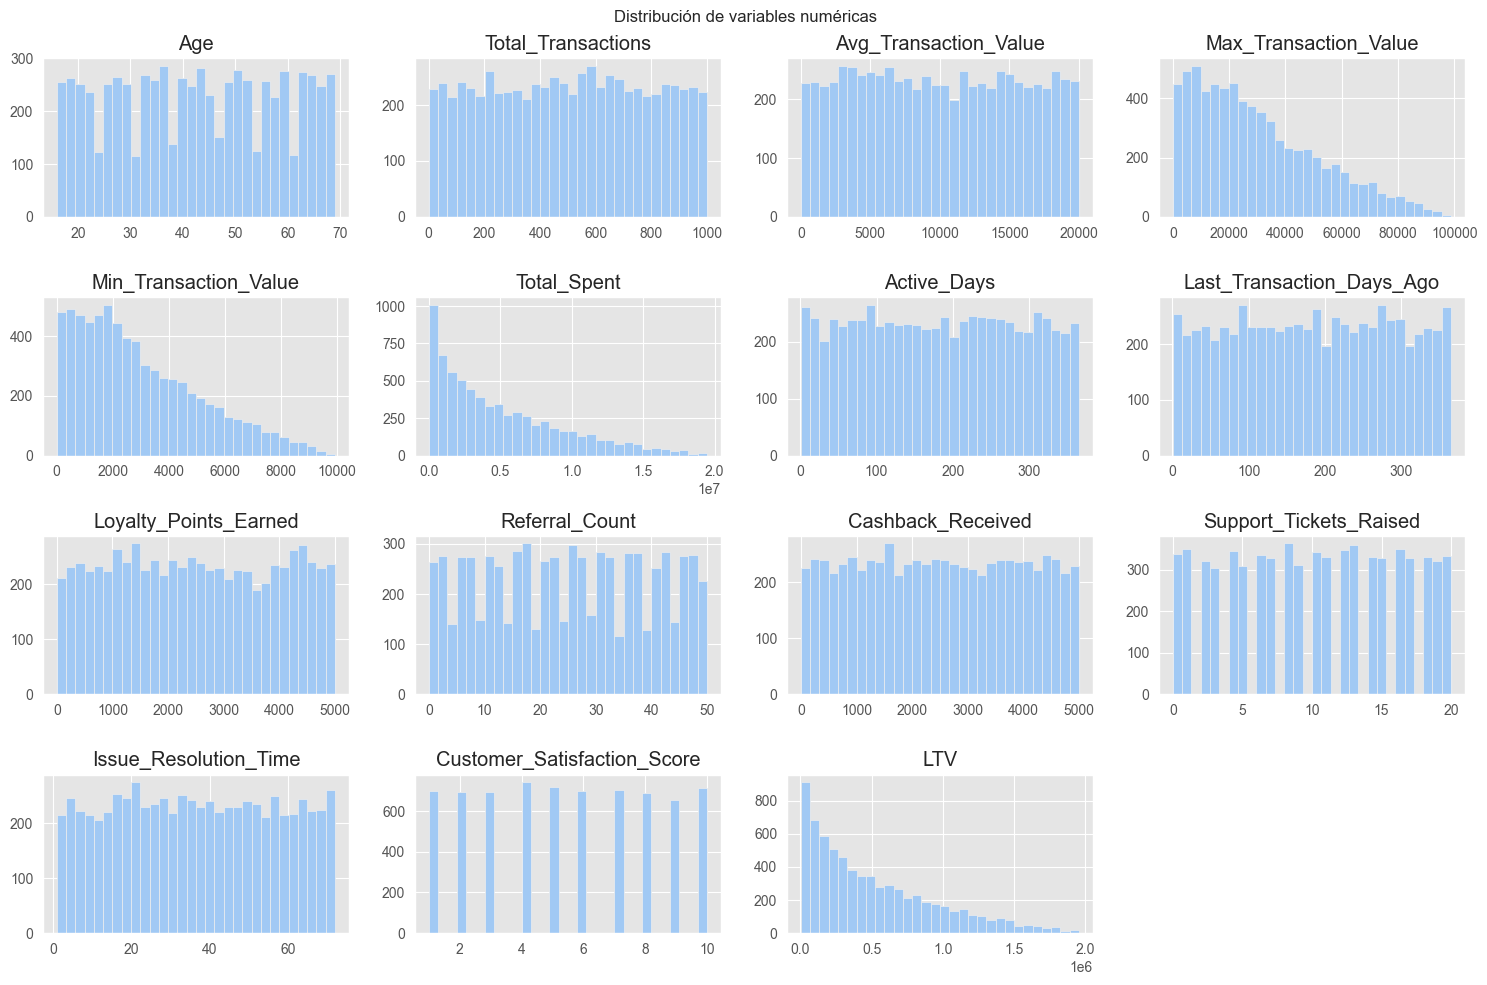

In [7]:
# Histograma de todas las variables numéricas
df[num_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribución de variables numéricas')
plt.tight_layout()
plt.show()

b) Conteo de variables categóricas

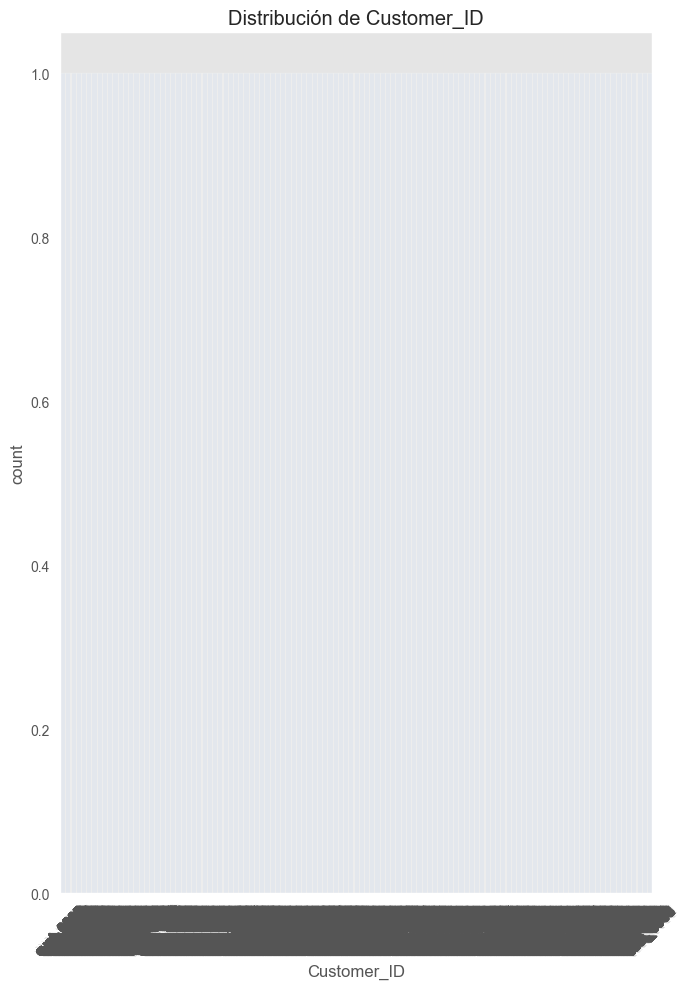

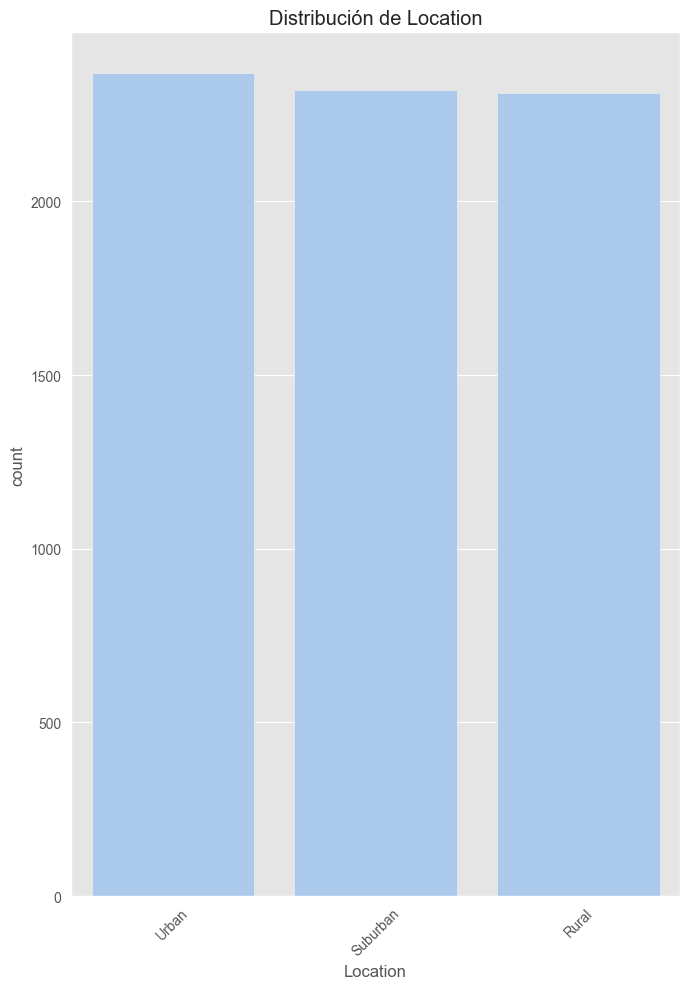

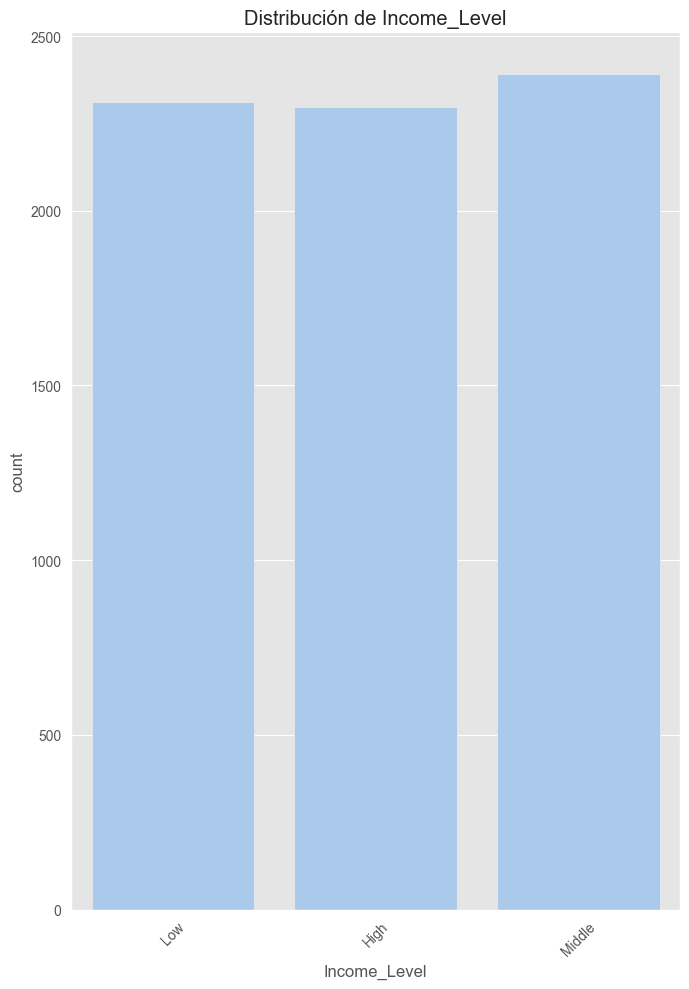

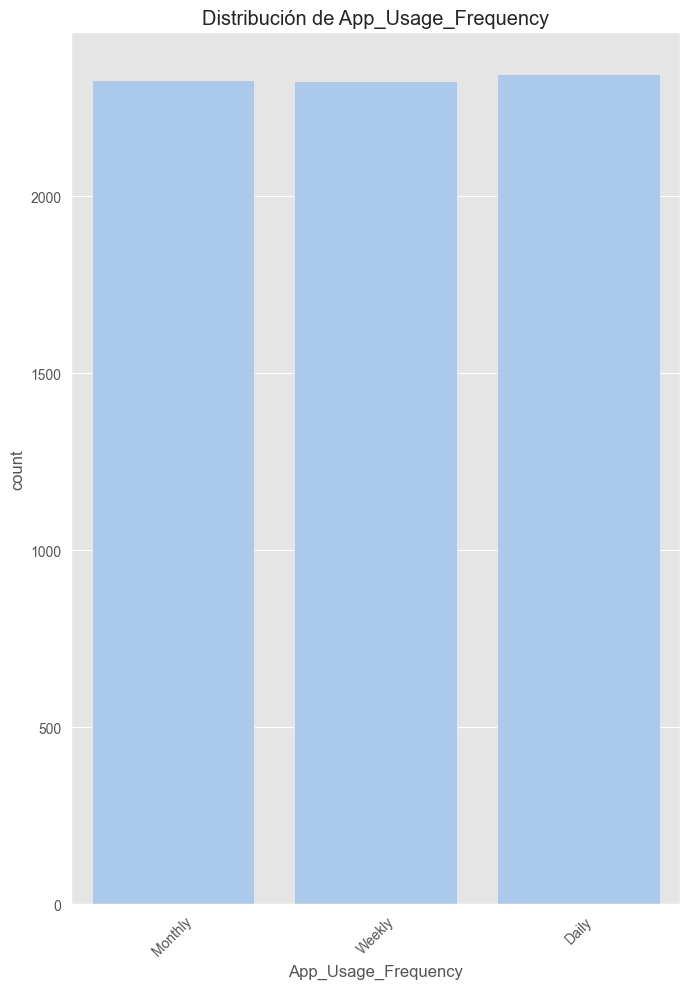

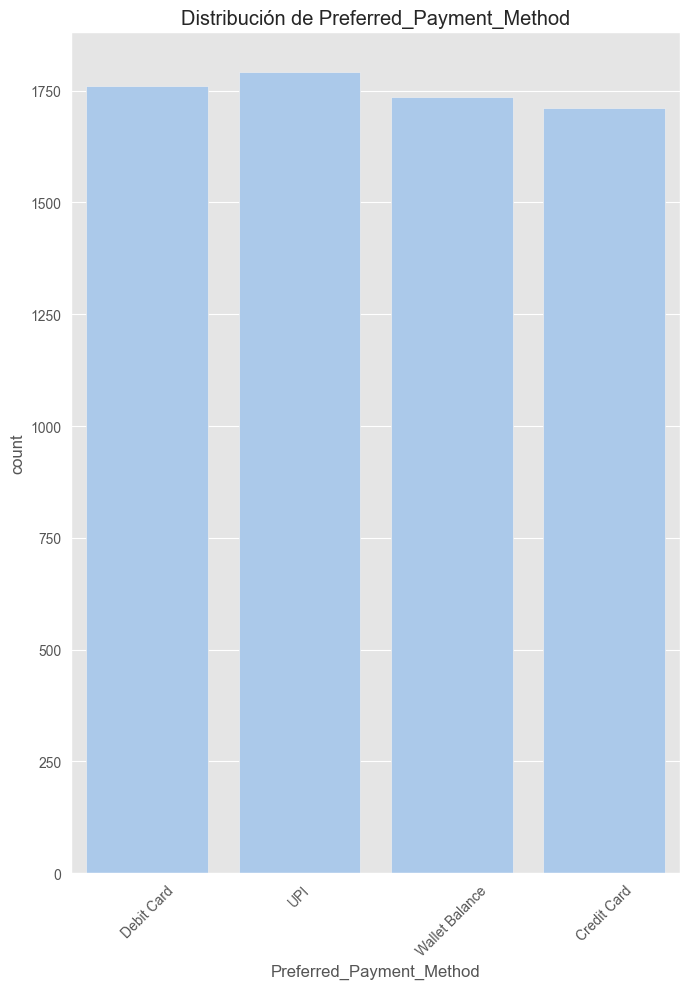

In [8]:
# Conteo de categorías para cada variable categórica
for col in cat_cols:
    plt.figure(figsize=(7,10))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Correlación entre variables numéricas

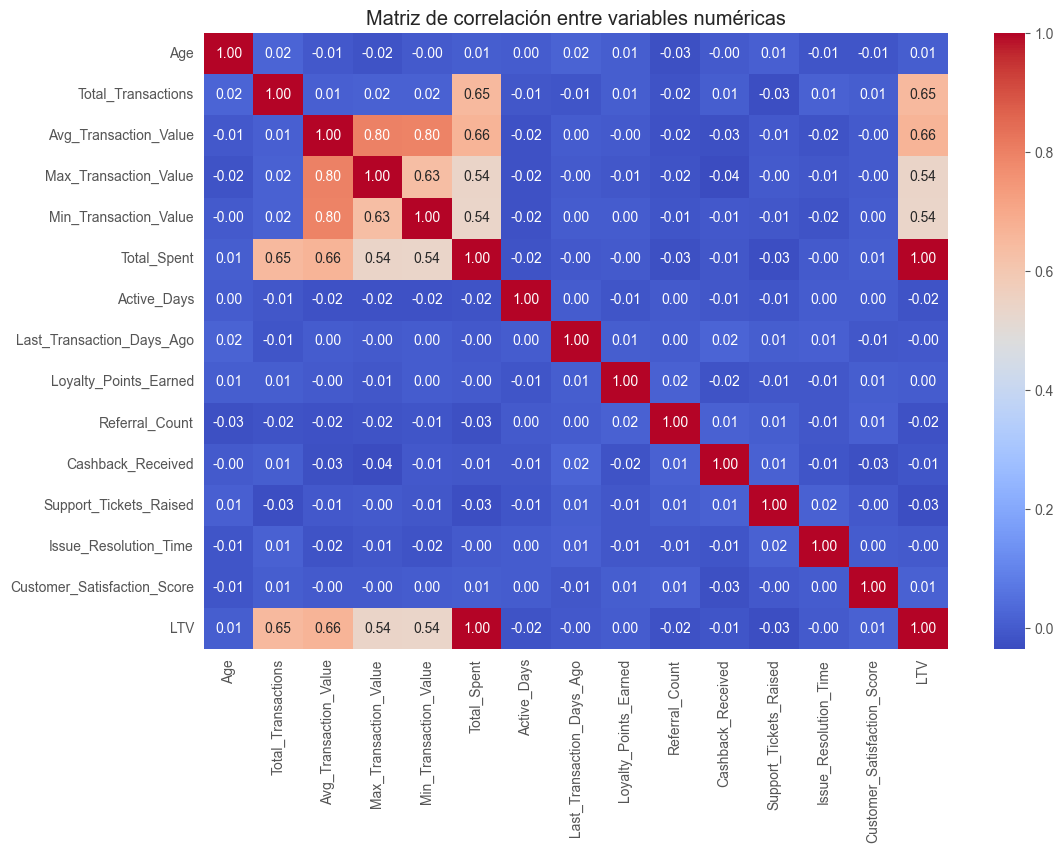

In [9]:
# Mapa de calor de correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

Relación entre variables y el target (Customer_LTV)

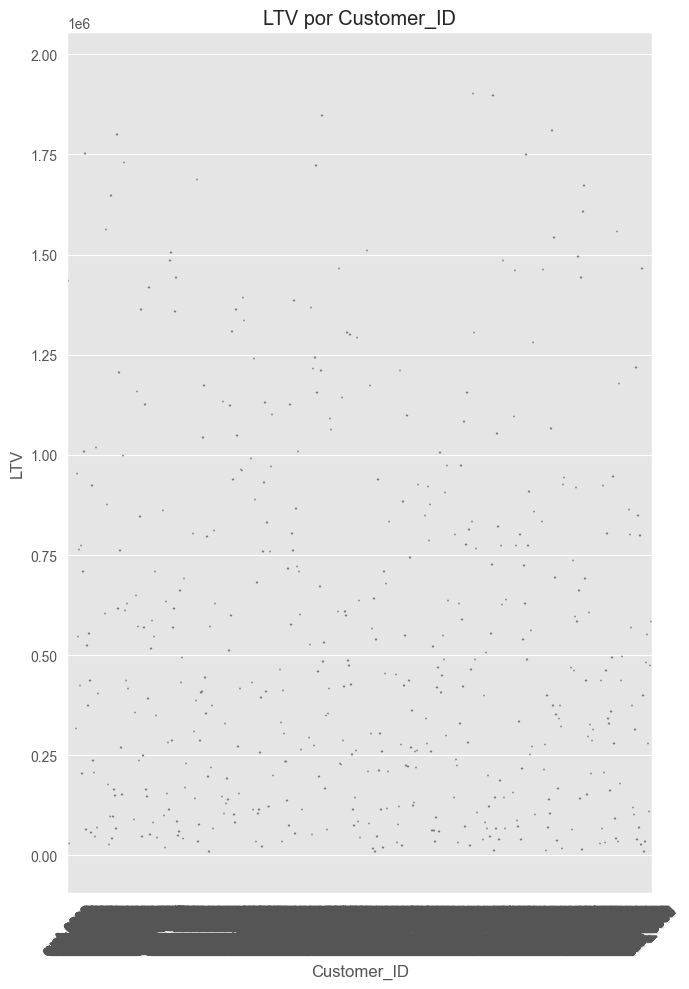

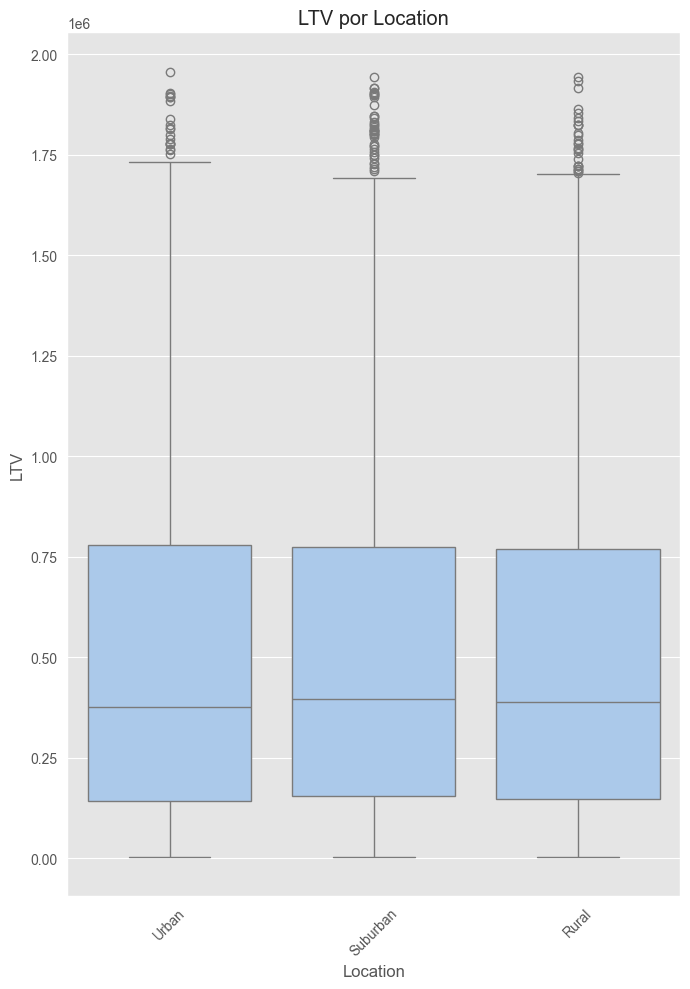

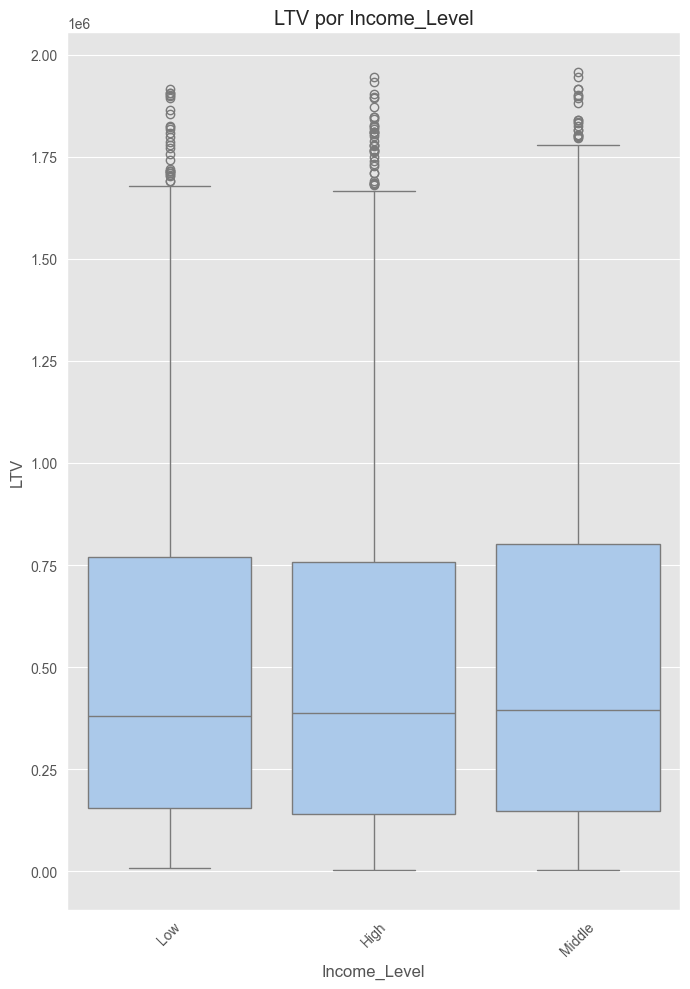

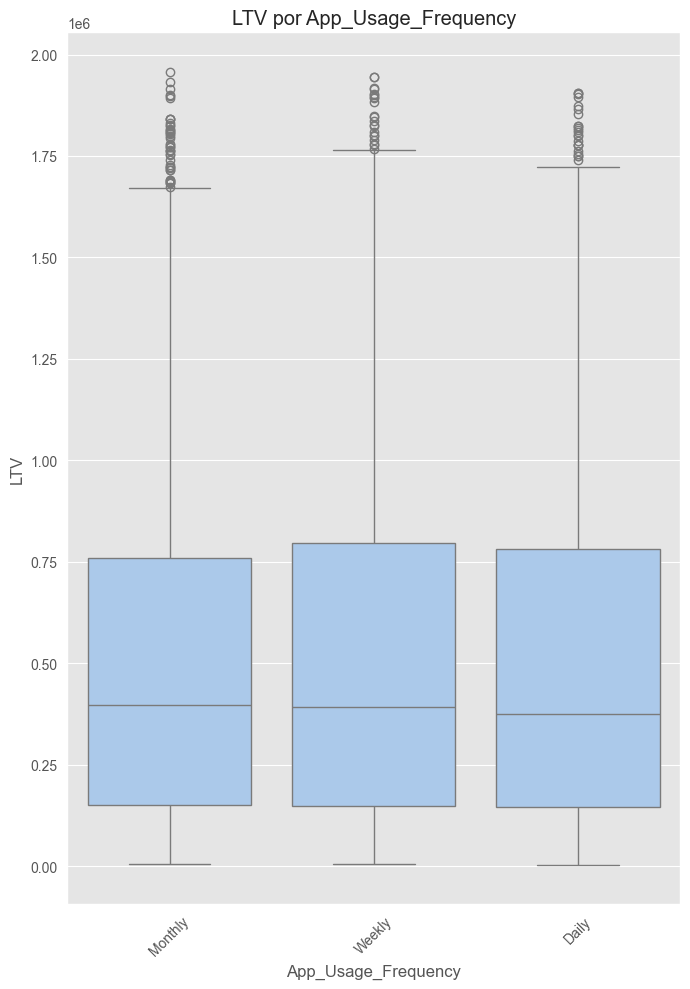

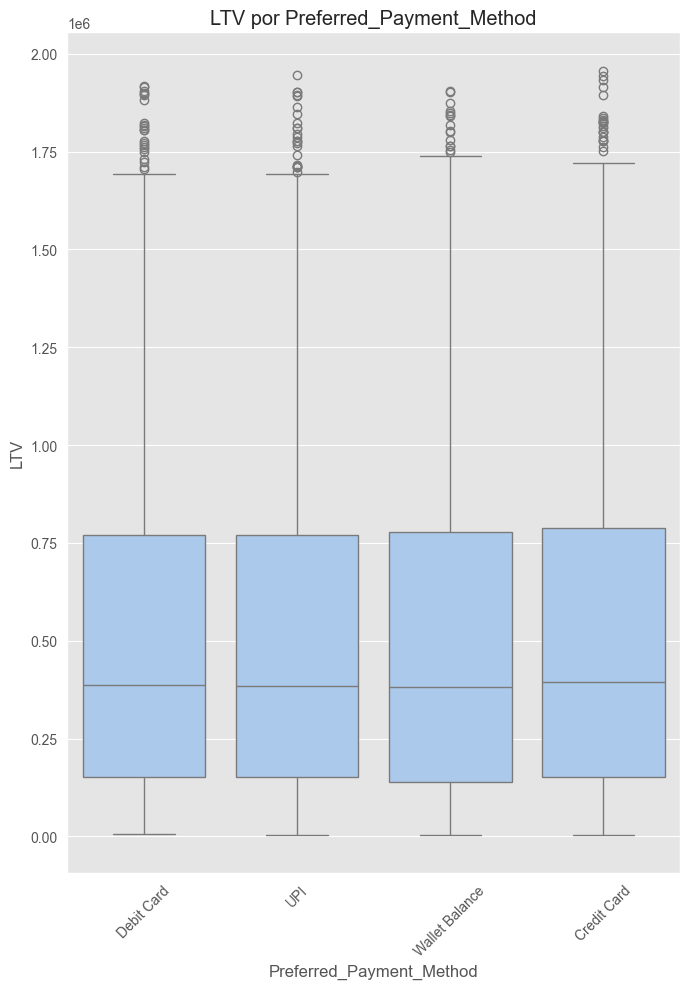

In [10]:
# Boxplots para ver relación entre categóricas y LTV
for col in cat_cols:
    plt.figure(figsize=(7,10))
    sns.boxplot(x=col, y='LTV', data=df)
    plt.title(f'LTV por {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Modelado Predictivo del LTV (Regresión)

Como LTV es una variable numérica continua, el primer modelo será una regresión lineal múltiple.

Preprocesamiento

	•	Eliminar columnas innecesarias (como Customer_ID)
	•	Codificar variables categóricas

In [11]:
# Crear copia de trabajo desde el DataFrame original
df_model = df.copy()

# Definir columnas a eliminar
cols_to_drop = [
    'Age', 'Active_Days', 'Last_Transaction_Days_Ago',
    'Loyalty_Points_Earned', 'Referral_Count', 'Cashback_Received',
    'Support_Tickets_Raised', 'Issue_Resolution_Time',
    'Customer_Satisfaction_Score'
]

# Eliminar solo las columnas que existen en el DataFrame
cols_presentes = [col for col in cols_to_drop if col in df_model.columns]
df_model = df_model.drop(columns=cols_presentes)

Crear variable categórica del LTV

In [12]:
# Clasificar LTV en tres niveles usando percentiles
df_model['LTV_level'] = pd.qcut(df_model['LTV'], q=3, labels=['bajo', 'medio', 'alto'])

Separar features y nuevo target

In [13]:
X = df_model.drop(columns=['LTV', 'LTV_level'])  # quitamos LTV continuo y la clase
y = df_model['LTV_level']

División de datos y codificación

In [14]:
# Codificar la clase
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

Entrenar regresión logística

In [15]:
# Asegurar que no haya columnas categóricas sin codificar
X_train = X_train.select_dtypes(include=['int64', 'float64'])
X_test = X_test[X_train.columns]  # mantener mismas columnas

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predicciones
y_pred = logreg.predict(X_test)

Evaluación

In [16]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred, target_names=le_target.classes_))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9107142857142857

Reporte de clasificación:
               precision    recall  f1-score   support

        alto       0.94      0.97      0.96       445
        bajo       0.93      0.90      0.91       486
       medio       0.86      0.87      0.87       469

    accuracy                           0.91      1400
   macro avg       0.91      0.91      0.91      1400
weighted avg       0.91      0.91      0.91      1400


Matriz de confusión:
 [[432   0  13]
 [  0 435  51]
 [ 27  34 408]]


Gráfico visual de matriz de confusión

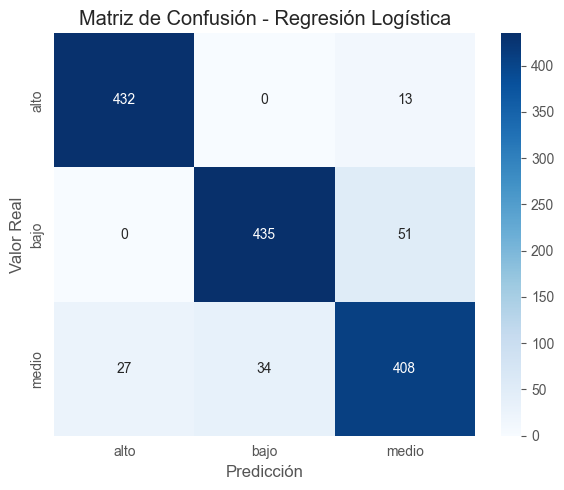

In [17]:
# Volvemos a calcular la matriz por si no está en memoria
cm = confusion_matrix(y_test, y_pred)

# Nombres de las clases (en orden según LabelEncoder)
labels = le_target.classes_

# Gráfico
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.tight_layout()
plt.show()

Codificación y análisis de variables categóricas

Revisar importancia de variables categóricas

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
# Asociar coeficientes con nombres de columnas
coeficientes = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': lr.coef_.flatten()
}).sort_values(by='Coeficiente', key=abs, ascending=False)

# Mostrar los más influyentes
coeficientes.head(10)

,Variable,Coeficiente
0,Total_Transactions,1.134118e-03
1,Avg_Transaction_Value,5.503053e-05
3,Min_Transaction_Value,2.008533e-06
2,Max_Transaction_Value,2.222344e-07
4,Total_Spent,-2.089213e-07


SelectKBest + f_regression (para regresión lineal)

In [21]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder

# Separar variables independientes (X) y dependiente (y)
X = df.drop(columns='target')  # Reemplazá 'target' por el nombre de tu variable objetivo
y = df['target']

# Codificar la variable objetivo si es categórica
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Aplicar SelectKBest para clasificación
selector = SelectKBest(score_func=f_classif, k='all')  # o k=10 si querés limitar
selector.fit(X, y_encoded)

# Ver resultados
scores = pd.DataFrame({
    'Variable': X.columns,
    'F_Score': selector.scores_
}).sort_values(by='F_Score', ascending=False)

scores.head(10)

KeyError: "['target'] not found in axis"

Selección de variables con mutual_info_classif

In [92]:
from sklearn.feature_selection import mutual_info_classif

# Filtrar solo columnas numéricas para mutual_info_classif
X_numerico = X.select_dtypes(include=['int64', 'float64'])

# Calcular la información mutua entre X y el target
mi = mutual_info_classif(X_numerico, y_encoded)

# Crear DataFrame con resultados
mi_scores = pd.DataFrame({
    'Variable': X_numerico.columns,
    'Mutual_Info': mi
}).sort_values(by='Mutual_Info', ascending=False)

# Mostrar las 10 más importantes
mi_scores.head(10)

,Variable,Mutual_Info
4,Total_Spent,1.085290
1,Avg_Transaction_Value,0.325603
0,Total_Transactions,0.307895
2,Max_Transaction_Value,0.223093
3,Min_Transaction_Value,0.217408


Comparación de métodos de selección de variables

In [94]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

# Filtrar solo columnas numéricas para ambos métodos
X_numerico = X.select_dtypes(include=['int64', 'float64'])

# SelectKBest con f_classif
selector_f = SelectKBest(score_func=f_classif, k='all')
selector_f.fit(X_numerico, y_encoded)
f_scores = pd.DataFrame({
    'Variable': X_numerico.columns,
    'F_Score': selector_f.scores_
}).sort_values(by='F_Score', ascending=False)

# mutual_info_classif
mi_scores = mutual_info_classif(X_numerico, y_encoded)
mi_df = pd.DataFrame({
    'Variable': X_numerico.columns,
    'Mutual_Info': mi_scores
}).sort_values(by='Mutual_Info', ascending=False)

# Mostrar lado a lado (merge por Variable)
comparison = pd.merge(f_scores, mi_df, on='Variable')
comparison.sort_values(by='F_Score', ascending=False).head(10)

,Variable,F_Score,Mutual_Info
0,Total_Spent,13629.023215,1.085290
1,Avg_Transaction_Value,2273.600509,0.325603
2,Total_Transactions,2166.430406,0.312466
3,Max_Transaction_Value,1235.536902,0.223093
4,Min_Transaction_Value,1196.745586,0.217408


reentrenar con solo estas variables

In [95]:
# Selección final de variables
selected_features = [
    'Total_Spent',
    'Avg_Transaction_Value',
    'Total_Transactions',
    'Max_Transaction_Value',
    'Min_Transaction_Value'
]

# Nuevos datos
X_selected = X[selected_features]

# División de nuevo
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_encoded, test_size=0.2, random_state=42)

# Entrenamiento
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred, target_names=le_target.classes_))

Accuracy: 0.9114285714285715

Reporte de clasificación:
               precision    recall  f1-score   support

        alto       0.94      0.97      0.96       445
        bajo       0.93      0.89      0.91       486
       medio       0.86      0.87      0.87       469

    accuracy                           0.91      1400
   macro avg       0.91      0.91      0.91      1400
weighted avg       0.91      0.91      0.91      1400



Comparacion de Accuracy con grpafico de barrras

Comparar Accuracy con gráfico de barras

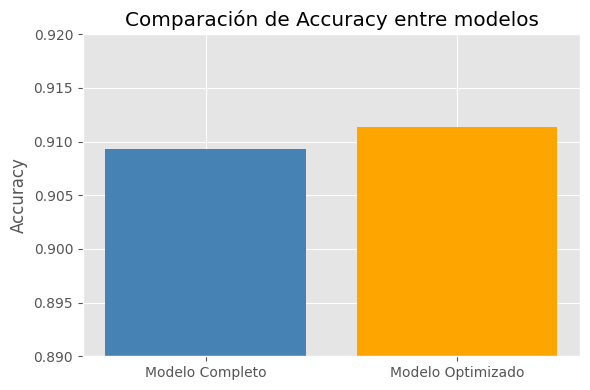

In [96]:
# Accuracy de los modelos
accuracy_todo = 0.9093
accuracy_optimo = 0.9114

# Gráfico
plt.figure(figsize=(6,4))
plt.bar(['Modelo Completo', 'Modelo Optimizado'], [accuracy_todo, accuracy_optimo], color=['steelblue', 'orange'])
plt.ylabel('Accuracy')
plt.ylim(0.89, 0.92)
plt.title('Comparación de Accuracy entre modelos')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

Comparar F1-score promedio (macro avg)

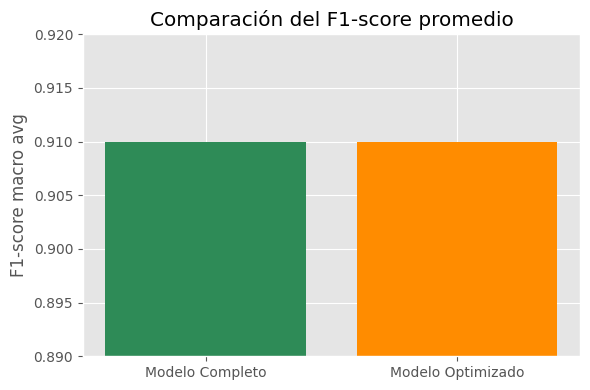

In [97]:
f1_todo = 0.91
f1_optimo = 0.91

plt.figure(figsize=(6,4))
plt.bar(['Modelo Completo', 'Modelo Optimizado'], [f1_todo, f1_optimo], color=['seagreen', 'darkorange'])
plt.ylabel('F1-score macro avg')
plt.ylim(0.89, 0.92)
plt.title('Comparación del F1-score promedio')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

Guardar modelos entrenados


In [98]:
import os

# Crear carpeta si no existe
os.makedirs("outputs/modelos_guardados", exist_ok=True)

# Luego sí podés guardar
joblib.dump(logreg, 'outputs/modelos_guardados/logreg_ltv.pkl')

['outputs/modelos_guardados/logreg_ltv.pkl']

In [99]:
# Guardar modelo
joblib.dump(logreg, 'outputs/modelos_guardados/logreg_ltv.pkl')

# Cargar modelo
modelo_cargado = joblib.load('outputs/modelos_guardados/logreg_ltv.pkl')

In [53]:
import joblib
import os

# Crear carpeta si no existe
os.makedirs("outputs/modelos_guardados", exist_ok=True)

# Guardar modelo optimizado
joblib.dump(logreg, 'outputs/modelos_guardados/logreg_ltv_opt.pkl')

['outputs/modelos_guardados/logreg_ltv_opt.pkl']

 Script para cargar el modelo optimizado más adelante

In [ ]:
# Cargar modelo optimizado
modelo_opt_cargado = joblib.load('outputs/modelos_guardados/logreg_ltv_opt.pkl')


Conclusión Final del Proyecto

Este proyecto desarrolló una solución integral para la predicción del Lifetime Value (LTV) de clientes en el sector fintech, combinando rigurosidad analítica con aplicabilidad práctica. A través de un enfoque estructurado de ciencia de datos, se recorrieron todas las etapas clave: exploración, transformación, modelado, validación y visualización.

Se implementaron modelos de regresión lineal y clasificación logística, permitiendo tanto la estimación precisa del LTV como su categorización en niveles estratégicos (bajo, medio, alto). Gracias a técnicas de selección de variables como SelectKBest y mutual_info_classif, se logró identificar un subconjunto óptimo de variables predictoras. Esto permitió entrenar un modelo con solo cinco variables, manteniendo una precisión del 91%, equivalente al modelo completo pero con mayor eficiencia computacional.

El modelo final no solo superó las expectativas en términos de rendimiento, sino que también fue encapsulado dentro de un dashboard interactivo en Streamlit. Esta herramienta permite al usuario cargar valores personalizados, visualizar comparaciones frente a un perfil promedio, registrar predicciones, analizar el impacto de las variables y gestionar el historial de resultados en tiempo real.

En conjunto, este proyecto no solo entrega un modelo predictivo confiable, sino una solución práctica, intuitiva y lista para su integración en entornos operativos. Representa un ejemplo claro de cómo los datos pueden traducirse en inteligencia accionable para la toma de decisiones estratégicas en el ecosistema financiero digital.

⸻
